# Introduction to Scikit-Learn(sklearn)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 


# an end to end sklearn work flow

In [2]:
import pandas as pd
heart_disease=pd.read_csv("datas/heart-disease.csv.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# create x (feature matrix)

x=heart_disease.drop("target",axis=1)
# create y (feature matrix)
y=heart_disease["target"]

In [4]:
#s,choose the right model and hyperparameter
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

#we'll keep the default hyperparameter

#clf.get_params()


In [5]:
#3.fit the model to the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [6]:
import sklearn
sklearn.show_versions( )


System:
    python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Priya\anaconda3\python.exe
   machine: Windows-10-10.0.18362-SP0

Python dependencies:
       pip: 20.0.2
setuptools: 45.2.0.post20200210
   sklearn: 0.22.1
     numpy: 1.18.1
     scipy: 1.4.1
    Cython: 0.29.15
    pandas: 1.0.1
matplotlib: 3.1.3
    joblib: 0.14.1

Built with OpenMP: True


In [7]:
clf.fit(x_train,y_train);

In [8]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3


In [9]:
y_preds = clf.predict(x_test)
y_preds

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [10]:
y_test

140    1
98     1
248    0
166    0
184    0
      ..
123    1
236    0
267    0
32     1
275    0
Name: target, Length: 61, dtype: int64

In [11]:
#4.evaluate thr model on the training data and test data
clf.score(x_train,y_train)

1.0

In [12]:
clf.score(x_test,y_test)

0.8688524590163934

In [13]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds) )

              precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.81      0.97      0.88        30

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [14]:
confusion_matrix(y_test,y_preds)

array([[24,  7],
       [ 1, 29]], dtype=int64)

In [15]:
accuracy_score(y_test,y_preds)

0.8688524590163934

In [16]:
#5.improve model

np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set:{clf.score(x_test,y_test)*100:2f}%")
    print("")

Trying model with 10 estimators..
Model accuracy on test set:78.688525%

Trying model with 20 estimators..
Model accuracy on test set:86.885246%

Trying model with 30 estimators..
Model accuracy on test set:86.885246%

Trying model with 40 estimators..
Model accuracy on test set:85.245902%

Trying model with 50 estimators..
Model accuracy on test set:81.967213%

Trying model with 60 estimators..
Model accuracy on test set:85.245902%

Trying model with 70 estimators..
Model accuracy on test set:86.885246%

Trying model with 80 estimators..
Model accuracy on test set:85.245902%

Trying model with 90 estimators..
Model accuracy on test set:85.245902%



In [17]:
# save a model and load
import pickle

pickle.dump(clf, open("random_forst_model_1.pkl","wb"))

In [18]:
loaded_model = pickle.load(open("random_forst_model_1.pkl","rb"))
loaded_model.score(x_test, y_test)

0.8524590163934426

 # getting data ready

three maiin things we have to do is:


    1.split the data into features and labels (usually 'x' & 'y')
    2.filling (also called imputing) or disregarding missing values
    3. converting non-numerical values to numerical values(also called features encoding)

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
x=heart_disease.drop("target",axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y= heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# split the data into training and test sets

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [25]:
x.shape[0]*0.8

242.4

In [26]:
len(heart_disease)

303

In [27]:
242+61

303

### 1.1 make sure it's all numerical

In [28]:
car_sales = pd.read_csv("datas/car_sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
595,Toyota,Black,26979,4,35432
596,Nissan,White,223889,4,10091
597,Nissan,Blue,166938,4,11485
598,BMW,White,18394,5,112224


In [29]:
len(car_sales)

600

In [30]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [31]:
x= car_sales.drop("Price",axis=1)
y= car_sales["Price"]

x_train, x_test , y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

In [33]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [34]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour", "Doors"]
one_hot = OneHotEncoder( )
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.66938e+05],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.83940e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.12081e+05]])

In [36]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26979.0
596,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,223889.0
597,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,166938.0
598,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,18394.0


In [37]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
595,4,0,0,0,1,1,0,0,0,0
596,4,0,0,1,0,0,0,0,0,1
597,4,0,0,1,0,0,1,0,0,0
598,5,1,0,0,0,0,0,0,0,1


In [38]:

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)


model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
model.score(x_test, y_test)

0.9965902176659674

## 1.2 what if there are missing values?

1.fill them with some values (also known as imputation)                                                                
2.Remove the samples with missing data together

In [40]:
#import car sales missing data


car_sales_missing = pd.read_csv("datas/9.1 car-sales-extended-missing-data.csv.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [41]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### full missing data  with pandas

In [42]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [43]:
# make column
car_sales_missing["Make"].fillna ("missing", inplace=True)

#colour column
car_sales_missing["Colour"].fillna ("missing", inplace=True)

#Odometer column
car_sales_missing["Odometer (KM)"].fillna (car_sales_missing["Odometer (KM)"].mean(), inplace=True)

#Price column
car_sales_missing["Doors"].fillna (4, inplace=True)

In [44]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [45]:
# remove price missing values
car_sales_missing.dropna(inplace=True)

In [46]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [47]:
len(car_sales_missing)

950

In [48]:
  x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [49]:
# lets convert our data to number

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour", "Doors"]
one_hot = OneHotEncoder( )
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [50]:
car_sales_missing = pd.read_csv("datas/9.1 car-sales-extended-missing-data.csv.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [51]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [52]:
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [53]:
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [54]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [55]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer  = SimpleImputer(strategy = "constant", fill_value="missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value=4)
num_imputer =SimpleImputer (strategy = "mean")

cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features  = ["Odometer (KM)"]
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("dooor_imputer", door_imputer,door_features),
    ("num_imputer", num_imputer,num_features)  
])

filled_x =  imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [56]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns=["Make","Colour","Doors","Odometer (KM) "])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [57]:
car_sales_filled.isna().sum()

Make              0
Colour            0
Doors             0
Odometer (KM)     0
dtype: int64

In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour", "Doors"]
one_hot = OneHotEncoder( )
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [59]:
# now  we've got our data as number and filled (no missing)
#let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

In [60]:
len(car_sales_filled), len(car_sales)

(950, 600)

# 2.Choosing the right estimator/alogrithm for our problem

scikit-learn uses estimator as another term for machine learning model or algorithm

In [61]:
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [62]:
boston_df = pd.DataFrame(boston["data"],columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [63]:
len(boston_df)

506

In [64]:
from sklearn.linear_model import Ridge

np.random.seed(42)

x= boston_df.drop("target",axis=1)
y = boston_df["target"]


x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2)

model = Ridge()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.6662221670168522

 # how to improve the score

In [65]:
#let's try the random  forst regressor
from sklearn.ensemble import RandomForestRegressor


#setup random seed
np.random.seed(42)

#create the data
x = boston_df.drop("target",axis=1)
y = boston_df["target"]

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

#instatiate random forest regressor

rf= RandomForestRegressor()
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.873969014117403

In [66]:

model.score(x_test, y_test)

0.6662221670168522

# 2.2 choosing an estimator for a classification problem

In [67]:
heart_disease = pd.read_csv("datas/heart-disease.csv.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [68]:
len(heart_disease)

303

In [69]:
#let's try the random  forst regressor
from sklearn.svm import LinearSVC


#setup random seed
np.random.seed(42)

#create the data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

#instatiate random forest regressor

clf= LinearSVC(max_iter=1000)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

C:\Users\Priya\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4918032786885246

In [70]:
heart_disease["target"].value_counts(
)

1    165
0    138
Name: target, dtype: int64

In [71]:
#let's try the random  forst regressor
from sklearn.ensemble.forest import RandomForestClassifier


#setup random seed
np.random.seed(42)

#create the data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

#instatiate random forest regressor

clf= RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

C:\Users\Priya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


0.8524590163934426

In [72]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 3.1 fit the model/algorithm

In [73]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [74]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [75]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

# 3.2 Make prediction using ML model

### 1.predict()
### 2.predict_proba()

In [76]:
#use a trained  model to make predictions

clf.predict(np.array([1, 7, 8, 3, 4]))

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [77]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [78]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [79]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [80]:
# compare prediction to truth labels to evaluate the model

y_preds = clf.predict(x_test)

np.mean(y_preds == y_test)

0.8524590163934426

In [81]:
clf.score(x_test, y_test)

0.8524590163934426

# predict() vs predict_proba()

In [82]:
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [83]:
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [84]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [85]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)


x= boston_df.drop("target",axis=1)
y=boston_df["target"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor().fit(x_train, y_train)

y_preds = model.predict(x_test)


In [86]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [87]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [88]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.1226372549019623

# 4. evaluating ML model

In [89]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
clf.score(x_test, y_test)

0.8524590163934426

In [91]:
clf.score(x_train, y_train)

1.0

# lets do same for regressor

In [92]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target",axis=1)
y =  boston_df["target"]

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor().fit(x_train, y_train)

In [93]:
model.score(x_test,y_test)

0.873969014117403

# 4.2 EVALUATING A MODEL USING SCORING PARAMETER

In [94]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
clf.score(x_test, y_test)

0.8524590163934426

In [96]:
cross_val_score(clf, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [97]:
np.random.seed(42)


clf_single_score = clf.score(x_test, y_test)


clf_cross_val_score = np.mean(cross_val_score(clf, x, y ))


clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [98]:
cross_val_score(clf, x, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

In [99]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,x,y)

In [100]:
print(f"Heart Disease Classifier Cross Validated Accuracy:{np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross Validated Accuracy:82.15%


In [101]:
np.mean(cross_val_score)

0.8215300546448088

### AUC/ROC

In [102]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [103]:
from sklearn.metrics import roc_curve

clf.fit(x_train, y_train)

y_probs= clf.predict_proba(x_test)

y_probs[:10]

array([[0.89, 0.11],
       [0.05, 0.95],
       [0.1 , 0.9 ],
       [0.79, 0.21],
       [0.09, 0.91],
       [0.02, 0.98],
       [0.76, 0.24],
       [0.19, 0.81],
       [0.62, 0.38],
       [0.99, 0.01]])

In [104]:
y_probs_positive = y_probs[: ,1]
y_probs_positive[:10]

array([0.11, 0.95, 0.9 , 0.21, 0.91, 0.98, 0.24, 0.81, 0.38, 0.01])

In [105]:
fpr, tpr, thresholds= roc_curve(y_test, y_probs_positive)

In [106]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03846154,
       0.03846154, 0.03846154, 0.03846154, 0.11538462, 0.11538462,
       0.15384615, 0.15384615, 0.19230769, 0.19230769, 0.23076923,
       0.26923077, 0.26923077, 0.30769231, 0.34615385, 0.5       ,
       0.69230769, 0.73076923, 0.76923077, 0.84615385, 1.        ])

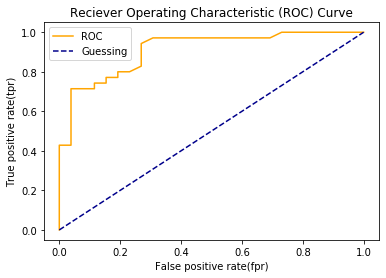

In [107]:
# creating roc curve

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    plots a ROC curve given the false positive rate (fpr)
    and true positive rate(tpr) of a model
    """
    
    plt.plot(fpr,tpr,color="orange", label="ROC")
    
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Reciever Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [108]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9093406593406593

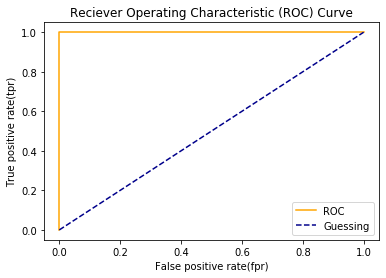

In [109]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [110]:
roc_auc_score(y_test, y_test)

1.0

### confusion model

In [111]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[21,  5],
       [ 8, 27]], dtype=int64)

In [112]:
pd.crosstab(y_test,
           y_preds,
           rownames = ["Actual Labels"],
           colnames = ["Predicted labels"])

Predicted labels,0,1
Actual Labels,,
0,21,5
1,8,27


In [113]:
22+7+8+24


61

In [114]:
len(x_test)

61

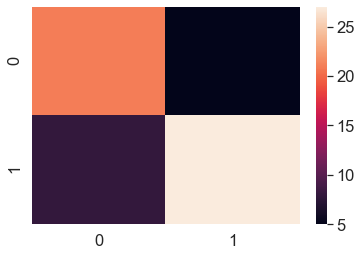

In [115]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat)

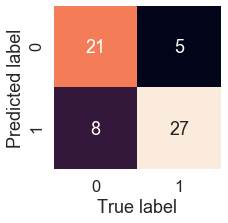

In [116]:
def plot_conf_mat(conf_mat):
    """
    plot a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax= sns.heatmap(conf_mat,
                   annot=True,
                   cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(conf_mat)

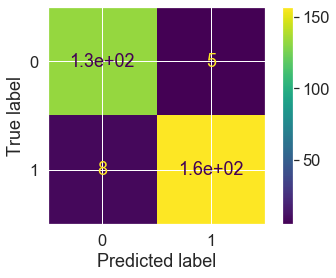

In [117]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,x,y)

# classification report

In [118]:
from sklearn.metrics import classification_report 

print(classification_report (y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.84      0.77      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [119]:
# where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\Priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2 regression model evaluation metrics

In [120]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target",axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


model = RandomForestRegressor()
model.fit(x_train,y_train);

In [121]:
model.score(x_test, y_test)

0.873969014117403

In [122]:
from sklearn.metrics import  r2_score


y_test_mean = np.full(len(y_test), y_test.mean())

In [123]:
y_test.mean()

21.488235294117654

In [124]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [125]:
r2_score(y_test, y_test)

1.0

### mean absolute error(MAE)

In [126]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.1226372549019623

In [127]:
df =pd.DataFrame(data={"actual values":y_test,
                      "predicted values":y_preds})

In [128]:
df["difference"] = df["predicted values"] -  df["actual values"]
df

,actual values,predicted values,difference
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


In [129]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.242328990196082

In [130]:
# Calculate MSE by hand
squared = np.square(df["difference"])
squared.mean()

9.24232899019608

# 4.3 Finally Using the SCoring parameter

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
clf = RandomForestClassifier()


In [132]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [133]:
print(f'The cross validate accuracy is:{np.mean(cv_acc)*100:2f}%')

The cross validate accuracy is:82.480874%


In [134]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y, scoring="accuracy")
print(f'The cross validate accuracy is:{np.mean(cv_acc)*100:2f}%')

The cross validate accuracy is:82.480874%


In [135]:
cv_precision = cross_val_score(clf, x, y,cv=5, scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [136]:
cv_recall = cross_val_score(clf,x,y, scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [137]:
cv_f1 = cross_val_score(clf,x,y,scoring="f1")
np.mean(cv_f1)

0.841476533416832

In [138]:
from sklearn.model_selection import cross_val_score

np.random.seed(42)

x = boston_df.drop("target",axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


model = RandomForestRegressor()


In [139]:
np.random.seed(42)
cv_f2 = cross_val_score(model, x,y,scoring=None)
np.mean(cv_f2)

0.622375083951403

In [140]:
np.random.seed(42)
cv_f2 = cross_val_score(model, x,y,scoring="r2")
cv_f2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [141]:

cv_mae = cross_val_score(model, x,y,cv=5,scoring="neg_mean_absolute_error")
cv_mae

array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069])

### 4.4 Evaluating using metrics as scikit-learn function

In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y= heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

#make prediction
y_preds =  clf.predict(x_test)

#evaluate the classifier

print("Classifier metrics on the test set")
print(f"Accuracy:{accuracy_score(y_test, y_preds)*100:2f}%")
print(f"Precision:{precision_score(y_test, y_preds)}")
print(f"Recall:{recall_score(y_test, y_preds)}")
print(f"F1:{f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy:85.245902%
Precision:0.8484848484848485
Recall:0.875
F1:0.8615384615384615


In [143]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

x = boston_df.drop("target",axis=1)
y= boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

#make prediction
y_preds = model.predict(x_test)

#evaluate the classifier

print("Regressiom model metrics on the test set")
print(f"R^2:{r2_score(y_test, y_preds)}")
print(f"MAE:{mean_absolute_error(y_test, y_preds)}")
print(f"MSE:{mean_squared_error(y_test, y_preds)}")


Regressiom model metrics on the test set
R^2:0.8739690141174031
MAE:2.1226372549019623
MSE:9.242328990196082


#  5 improving a model

In [144]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [145]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# TUNING HYPERPARAMETER

In [146]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluating comparison on y_true labels vs. y_pred labels
    on a classification
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1,2)}
    print(f"Acc:{accuracy*100:2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1:{f1:.2f}")
    
    return metric_dict

In [147]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

x = heart_disease_shuffled.drop("target", axis = 1)
y= heart_disease_shuffled["target"]


train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
x_train, y_train = x[:train_split],y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[:valid_split]

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

y_preds = clf.predict(x_valid)

baseline_metrics = evaluate_preds(y_valid , y_preds)
baseline_metrics

Acc:82.222222%
Precision:0.81
Recall:0.88
F1:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [148]:
np.random.seed(42)

clf_2 = RandomForestClassifier()
clf_2.fit(x_train, y_train)

y_preds_2 = clf_2.predict(x_valid)

clf_2_metrics = evaluate_preds(y_valid,y_preds_2)

Acc:82.222222%
Precision:0.84
Recall:0.84
F1:0.84


### 5.2. Hyperparameter tuning with RandomizedSearchCV

In [149]:
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators":[10,100,200,500,1000,1200],
       "max_depth":[None, 5, 10, 20, 30],
       "max_features":["auto", "sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}


np.random.seed(42)

x = heart_disease_shuffled.drop("target", axis = 1)
y= heart_disease_shuffled["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_jobs = 1)


rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions= grid,
                           n_iter=10,
                           cv=5,
                           verbose=2)

rs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.5s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   47.5s finished


In [150]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [151]:
rs_y_preds = rs_clf.predict(x_test)

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc:81.967213%
Precision:0.77
Recall:0.86
F1:0.81


### 5.3 Hyperparameter tuning with GridSearchCV 

In [152]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [153]:
grid_2 ={"n_estimators":[10,100,200,500],
       "max_depth":[None],
       "max_features":["auto", "sqrt"],
       "min_samples_split":[6],
       "min_samples_leaf":[1,2]}

In [154]:
from sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(42)

x = heart_disease_shuffled.drop("target", axis = 1)
y= heart_disease_shuffled["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#clf = RandomForestClassifier(n_jobs = 1)


#gs_clf = GridSearchCV(estimator=clf,
                        #   param_grid= grid_2,
                         #  cv=5,
                           #verbose=2)

#gs_clf.fit(x_train, y_train);

In [160]:
gs_clf.best_params_

NameError: name 'gs_clf' is not defined

In [ ]:
gs_y_preds = gs_clf.predict(x_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

In [ ]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "clf_2":clf_2_metrics,
                               "random search": rs_metrics,
                               "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8))

## 6. Saving and loading trained ML modes


2 ways 
1. with python pickel module 
2. with joblib module

In [ ]:
import pickle

pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl","wb"))

In [156]:
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl","rb"))

FileNotFoundError: [Errno 2] No such file or directory: 'gs_random_forest_model_1.pkl'

In [157]:
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

NameError: name 'loaded_pickle_model' is not defined

# joblib

In [158]:
from joblib import dump, load

dump(gs_clf,filename= "gs_random_forest_1.joblib")

NameError: name 'gs_clf' is not defined

In [159]:
loaded_job_model = load(filename= "gs_random_forest_1.joblib")

FileNotFoundError: [Errno 2] No such file or directory: 'gs_random_forest_1.joblib'

In [ ]:
joblib_y_preds = loaded_job_model.predict(x_test)
evaluate_preds(y_test,joblib_y_preds)

# 7.Putting all together

In [ ]:
data =  pd.read_csv("datas/9.1 car-sales-extended-missing-data.csv.csv")
data

In [ ]:
data.dtypes

In [ ]:
data.isna().sum()

## steps we want to do (all in one cell):

### 1.Fill the missing data
### 2. convert to number
### 3.build a model

In [161]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

import numpy as np
np.random.seed(42)

data = pd.read_csv("datas/9.1 car-sales-extended-missing-data.csv.csv")
data.dropna(subset =["Price"], inplace = True )

categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))])

door_features = ["Doors"]
door_transformer = Pipeline(steps = [
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))
])


preprocessor = ColumnTransformer(transformers=[
    ("cat", categorical_transformer,categorical_features),
    ("door", door_transformer,door_features),
    ("num",numeric_transformer,numeric_features)
])


model = Pipeline(steps=[("preprocessor", preprocessor),
                       ("model", RandomForestRegressor())])

x = data.drop("Price", axis=1)
y = data["Price"]
x_train, x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

model.fit(x_train,y_train)
model.score(x_test,y_test)

0.22188417408787875

In [ ]:
from sklearn.model_selection import GridSearchCV
pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None, 5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2, 4]
}


gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose = 2)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.6s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

In [ ]:
gs_model.score(x_test,y_test)